# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
from api_keys import weather_api_key
from citipy import citipy
from scipy.stats import linregress

In [2]:
city_data = pd.read_csv("../output_data/cities.csv")
city_data.dropna()
city_data

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Set base url and units variables, and combine them to get the base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
base_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_name_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []
date_list =[]

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(base_url + city).json()
    #print("Base URL ", base_url + city)
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
           
        city_name = response_json['name']
        city_name_list.append(city_name)
         
        country_name = response_json['sys']['country']
        country_name_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
        
        #date = response_json['date']
        #date_list.append(date)
    
        print(f"City Name: {city}, City ID: {city_id}, Temperature:{temp},  Humidity:{humidity}, Clouds:{clouds}, Wind Speed:{wind_speed}")
        print(f"--------------------------------------------------------------------------------------")
    # Print error message and move on to the next city if there is an error
    except:
        
        print("****************************That record does not exist, searching for next record...")
        print("----------------------------------------------------------------------------------------")
    
        

City Name: khorixas, City ID: 3356213, Temperature:64.4,  Humidity:18, Clouds:13, Wind Speed:1.12
--------------------------------------------------------------------------------------
City Name: santa vitoria do palmar, City ID: 3449747, Temperature:57.38,  Humidity:78, Clouds:79, Wind Speed:9.53
--------------------------------------------------------------------------------------
City Name: ahipara, City ID: 2194098, Temperature:52.23,  Humidity:83, Clouds:81, Wind Speed:9.48
--------------------------------------------------------------------------------------
City Name: cape town, City ID: 3369157, Temperature:53.47,  Humidity:66, Clouds:0, Wind Speed:5.75
--------------------------------------------------------------------------------------
City Name: vibo valentia, City ID: 6457405, Temperature:71.8,  Humidity:72, Clouds:24, Wind Speed:10.51
--------------------------------------------------------------------------------------
City Name: puerto ayora, City ID: 3652764, Temperatu

****************************That record does not exist, searching for next record...
----------------------------------------------------------------------------------------
City Name: itarema, City ID: 3393692, Temperature:82.22,  Humidity:68, Clouds:57, Wind Speed:15.01
--------------------------------------------------------------------------------------
City Name: atuona, City ID: 4020109, Temperature:78.28,  Humidity:67, Clouds:22, Wind Speed:26.75
--------------------------------------------------------------------------------------
City Name: maniitsoq, City ID: 3421982, Temperature:48.38,  Humidity:86, Clouds:18, Wind Speed:6.35
--------------------------------------------------------------------------------------
City Name: hami, City ID: 1529484, Temperature:86.52,  Humidity:28, Clouds:0, Wind Speed:4.83
--------------------------------------------------------------------------------------
City Name: odweyne, City ID: 53372, Temperature:74.08,  Humidity:43, Clouds:94, Wind Sp

City Name: mishelevka, City ID: 2019945, Temperature:62.28,  Humidity:80, Clouds:30, Wind Speed:1.45
--------------------------------------------------------------------------------------
****************************That record does not exist, searching for next record...
----------------------------------------------------------------------------------------
City Name: bonavista, City ID: 5905393, Temperature:61.66,  Humidity:61, Clouds:59, Wind Speed:17.58
--------------------------------------------------------------------------------------
City Name: haines junction, City ID: 5969025, Temperature:58.75,  Humidity:65, Clouds:100, Wind Speed:3.09
--------------------------------------------------------------------------------------
City Name: khatanga, City ID: 2022572, Temperature:50.25,  Humidity:73, Clouds:98, Wind Speed:5.79
--------------------------------------------------------------------------------------
City Name: panama city, City ID: 3703443, Temperature:91.8,  Humidity:

****************************That record does not exist, searching for next record...
----------------------------------------------------------------------------------------
City Name: provideniya, City ID: 4031574, Temperature:48.2,  Humidity:95, Clouds:100, Wind Speed:7.74
--------------------------------------------------------------------------------------
City Name: glendive, City ID: 5654391, Temperature:89.35,  Humidity:28, Clouds:1, Wind Speed:6.91
--------------------------------------------------------------------------------------
City Name: stokmarknes, City ID: 3136690, Temperature:55.08,  Humidity:84, Clouds:75, Wind Speed:21.85
--------------------------------------------------------------------------------------
City Name: weligama, City ID: 1223738, Temperature:78.69,  Humidity:90, Clouds:100, Wind Speed:9.91
--------------------------------------------------------------------------------------
City Name: san carlos de bariloche, City ID: 7647007, Temperature:41.09,  H

City Name: harrismith, City ID: 997751, Temperature:37.18,  Humidity:48, Clouds:0, Wind Speed:2.91
--------------------------------------------------------------------------------------
City Name: trairi, City ID: 3386177, Temperature:83.07,  Humidity:66, Clouds:57, Wind Speed:12.88
--------------------------------------------------------------------------------------
City Name: east london, City ID: 1006984, Temperature:59.29,  Humidity:42, Clouds:0, Wind Speed:3.94
--------------------------------------------------------------------------------------
City Name: pafos, City ID: 146214, Temperature:79.88,  Humidity:73, Clouds:0, Wind Speed:4.61
--------------------------------------------------------------------------------------
City Name: buenos aires, City ID: 3435910, Temperature:58.64,  Humidity:64, Clouds:20, Wind Speed:4.61
--------------------------------------------------------------------------------------
City Name: ossora, City ID: 2122389, Temperature:53.65,  Humidity:95, 

City Name: kiama, City ID: 2161515, Temperature:53.2,  Humidity:75, Clouds:22, Wind Speed:1.01
--------------------------------------------------------------------------------------
City Name: strezhevoy, City ID: 1490796, Temperature:60.78,  Humidity:96, Clouds:94, Wind Speed:5.01
--------------------------------------------------------------------------------------
****************************That record does not exist, searching for next record...
----------------------------------------------------------------------------------------
City Name: hamilton, City ID: 4513583, Temperature:87.31,  Humidity:66, Clouds:77, Wind Speed:1.01
--------------------------------------------------------------------------------------
City Name: iqaluit, City ID: 5983720, Temperature:50.7,  Humidity:76, Clouds:100, Wind Speed:5.01
--------------------------------------------------------------------------------------
City Name: lindlar, City ID: 2877142, Temperature:69.33,  Humidity:85, Clouds:71, Win

City Name: aklavik, City ID: 5882953, Temperature:46.87,  Humidity:45, Clouds:45, Wind Speed:6.29
--------------------------------------------------------------------------------------
City Name: bardiyah, City ID: 80509, Temperature:80.58,  Humidity:72, Clouds:0, Wind Speed:14.63
--------------------------------------------------------------------------------------
City Name: goderich, City ID: 5962442, Temperature:78.75,  Humidity:85, Clouds:99, Wind Speed:20.6
--------------------------------------------------------------------------------------
City Name: los llanos de aridane, City ID: 2514651, Temperature:74.12,  Humidity:82, Clouds:20, Wind Speed:16.11
--------------------------------------------------------------------------------------
City Name: victoria point, City ID: 2145214, Temperature:62.94,  Humidity:94, Clouds:10, Wind Speed:1.99
--------------------------------------------------------------------------------------
City Name: mar del plata, City ID: 3430863, Temperatu

City Name: praia da vitoria, City ID: 3372760, Temperature:74.75,  Humidity:85, Clouds:30, Wind Speed:10.42
--------------------------------------------------------------------------------------
City Name: biak, City ID: 1637001, Temperature:74.12,  Humidity:91, Clouds:96, Wind Speed:3.22
--------------------------------------------------------------------------------------
City Name: te anau, City ID: 2181625, Temperature:43.21,  Humidity:96, Clouds:100, Wind Speed:1.61
--------------------------------------------------------------------------------------
City Name: gombong, City ID: 1643920, Temperature:72.45,  Humidity:88, Clouds:42, Wind Speed:5.1
--------------------------------------------------------------------------------------
City Name: gold coast, City ID: 2165087, Temperature:63.34,  Humidity:94, Clouds:29, Wind Speed:1.01
--------------------------------------------------------------------------------------
City Name: hofn, City ID: 2630299, Temperature:50.27,  Humidity:9

City Name: jesus del monte, City ID: 3526536, Temperature:76.41,  Humidity:81, Clouds:81, Wind Speed:3.83
--------------------------------------------------------------------------------------
City Name: portree, City ID: 2640006, Temperature:58.51,  Humidity:91, Clouds:82, Wind Speed:8.88
--------------------------------------------------------------------------------------
City Name: kirakira, City ID: 2178753, Temperature:79.68,  Humidity:85, Clouds:45, Wind Speed:13.2
--------------------------------------------------------------------------------------
City Name: faanui, City ID: 4034551, Temperature:79.66,  Humidity:71, Clouds:3, Wind Speed:19.46
--------------------------------------------------------------------------------------
City Name: ust-tsilma, City ID: 477940, Temperature:63.66,  Humidity:66, Clouds:55, Wind Speed:3.13
--------------------------------------------------------------------------------------
City Name: kloulklubed, City ID: 7671223, Temperature:82.18,  Hum

City Name: teruel, City ID: 3108125, Temperature:75.42,  Humidity:37, Clouds:24, Wind Speed:12.73
--------------------------------------------------------------------------------------
City Name: nalut, City ID: 2214432, Temperature:102.34,  Humidity:10, Clouds:3, Wind Speed:9.89
--------------------------------------------------------------------------------------
City Name: pahrump, City ID: 5509851, Temperature:95.68,  Humidity:24, Clouds:13, Wind Speed:1.99
--------------------------------------------------------------------------------------
City Name: arlit, City ID: 2447513, Temperature:103.95,  Humidity:7, Clouds:46, Wind Speed:10.2
--------------------------------------------------------------------------------------
City Name: kapustin yar, City ID: 552999, Temperature:81.39,  Humidity:45, Clouds:42, Wind Speed:7.11
--------------------------------------------------------------------------------------
City Name: ayan, City ID: 2027316, Temperature:59.2,  Humidity:76, Clouds:7

City Name: baykit, City ID: 1510689, Temperature:63.12,  Humidity:79, Clouds:52, Wind Speed:2.06
--------------------------------------------------------------------------------------
City Name: corinto, City ID: 259289, Temperature:87.69,  Humidity:41, Clouds:0, Wind Speed:3.02
--------------------------------------------------------------------------------------
City Name: luwuk, City ID: 1637001, Temperature:75.47,  Humidity:93, Clouds:95, Wind Speed:2.19
--------------------------------------------------------------------------------------
City Name: pasni, City ID: 1168312, Temperature:86.38,  Humidity:78, Clouds:85, Wind Speed:6.4
--------------------------------------------------------------------------------------
City Name: borogontsy, City ID: 2026160, Temperature:63.93,  Humidity:69, Clouds:100, Wind Speed:1.79
--------------------------------------------------------------------------------------
City Name: sisimiut, City ID: 3419842, Temperature:50.56,  Humidity:67, Clouds:

City Name: sibolga, City ID: 1213855, Temperature:75.69,  Humidity:78, Clouds:44, Wind Speed:3.91
--------------------------------------------------------------------------------------
City Name: guiyang, City ID: 1809461, Temperature:71.33,  Humidity:83, Clouds:100, Wind Speed:11.7
--------------------------------------------------------------------------------------
City Name: challans, City ID: 3027513, Temperature:74.21,  Humidity:69, Clouds:19, Wind Speed:13.38
--------------------------------------------------------------------------------------
City Name: otradnoye, City ID: 513898, Temperature:82.45,  Humidity:83, Clouds:85, Wind Speed:0.38
--------------------------------------------------------------------------------------
City Name: necochea, City ID: 3430443, Temperature:54.03,  Humidity:56, Clouds:0, Wind Speed:13.27
--------------------------------------------------------------------------------------
City Name: hirara, City ID: 1862505, Temperature:83.68,  Humidity:75, 

****************************That record does not exist, searching for next record...
----------------------------------------------------------------------------------------
City Name: muzhi, City ID: 1498161, Temperature:55.69,  Humidity:64, Clouds:91, Wind Speed:6.17
--------------------------------------------------------------------------------------
City Name: taloqan, City ID: 1123004, Temperature:83.3,  Humidity:22, Clouds:18, Wind Speed:3.51
--------------------------------------------------------------------------------------
City Name: ignalina, City ID: 598998, Temperature:76.39,  Humidity:76, Clouds:13, Wind Speed:1.92
--------------------------------------------------------------------------------------
City Name: wronki, City ID: 3081350, Temperature:79.52,  Humidity:69, Clouds:86, Wind Speed:5.03
--------------------------------------------------------------------------------------
City Name: kulevcha, City ID: 705442, Temperature:76.91,  Humidity:44, Clouds:0, Wind Spee

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_data_df = pd.DataFrame({"City" : (city_id_list),
    "City Name":(city_name_list),
    "Lat" : (lat_list),
    "Lng" : (lng_list),
    "Max Temp" : (temp_list),
    "Humidity" : (humidity_list),
    "Clouds" : (clouds_list),
    "Wind Speed" : (wind_speed_list),
    "Country" : (country_name_list)})

city_data_df.head(10)


,City,City Name,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country
0,3356213,Khorixas,-20.3667,14.9667,64.40,18,13,1.12,NA
1,3449747,Santa Vitória do Palmar,-33.5189,-53.3681,57.38,78,79,9.53,BR
2,2194098,Ahipara,-35.1667,173.1667,52.23,83,81,9.48,NZ
3,3369157,Cape Town,-33.9258,18.4232,53.47,66,0,5.75,ZA
4,6457405,Province of Vibo Valentia,38.6996,16.1274,71.80,72,24,10.51,IT
5,3652764,Puerto Ayora,-0.7393,-90.3518,74.55,85,82,5.01,EC
6,2108502,Honiara,-9.4333,159.9500,76.95,80,7,8.28,SB
7,3445026,Vila Velha,-20.3297,-40.2925,80.96,70,40,10.36,BR
8,478050,Ust'-Kulom,61.6864,53.6902,61.48,87,54,1.19,RU
9,3424607,Tasiilaq,65.6145,-37.6368,41.16,81,56,5.46,GL


In [41]:
city_data_df.to_csv("../Output/city_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
city_data_df.loc[city_data_df["Humidity"]>100]

,City,City Name,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country


In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

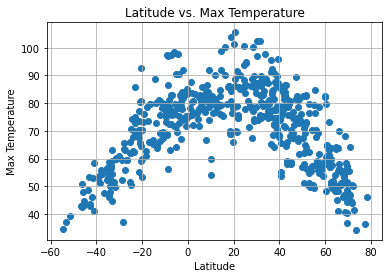

In [14]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"Latitude vs. Max Temperature")

plt.savefig("../Output/Lat_vs_temp")
plt.show()


## Latitude vs. Humidity Plot

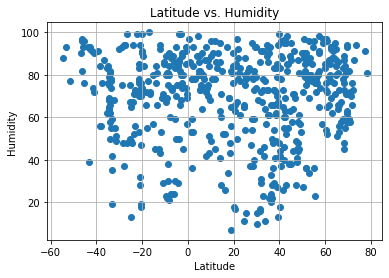

In [15]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs. Humidity")

plt.savefig("../Output/Lat_vs_humidity")
plt.show()

## Latitude vs. Cloudiness Plot

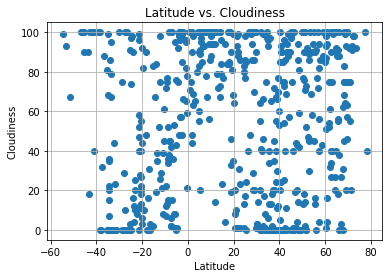

In [16]:
plt.scatter(city_data_df["Lat"], city_data_df["Clouds"], marker = "o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs. Cloudiness")

plt.savefig("../Output/Lat_vs_cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

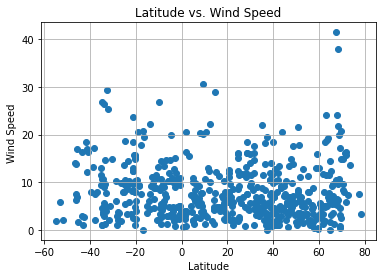

In [17]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed ")
plt.title(f"Latitude vs. Wind Speed")

plt.savefig("../Output/Lat_vs_windspeed")
plt.show()

## Linear Regression

In [18]:
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]

# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(stats.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6906705999016406


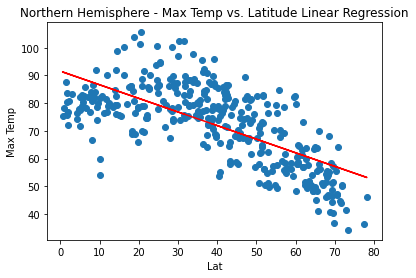

In [33]:
def plotLinearRegression(x_data,y_data,x_lr,y_lr,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_data,y_data)
    plt.plot(x_data,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(x_lr)
    plt.ylabel(y_lr)
    plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
    plt.savefig(f"../Output/fig{ifig}.png")
    plt.show()
    
x_lr = "Lat"
y_lr = "Max Temp"
lblpos = (0,25)
plotLinearRegression(northern_hemisphere[x_lr],northern_hemisphere[y_lr],x_lr,y_lr,lblpos,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.835307307605612


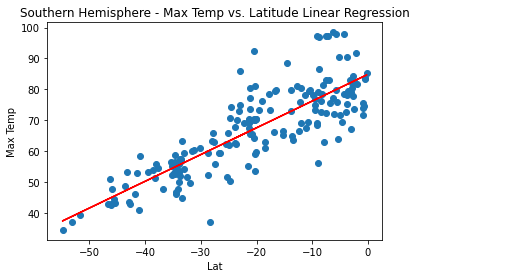

In [34]:
def plotLinearRegression(x_data,y_data,x_lr,y_lr,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_data,y_data)
    plt.plot(x_data,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(x_lr)
    plt.ylabel(y_lr)
    plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
    plt.savefig(f"../Output/fig{ifig}.png")
    plt.show()
    
x_lr = "Lat"
y_lr = "Max Temp"
lblpos = (0,25)
plotLinearRegression(southern_hemisphere[x_lr],southern_hemisphere[y_lr],x_lr,y_lr,lblpos,5)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08375441143888021


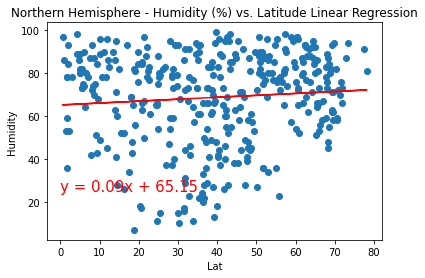

In [35]:
def plotLinearRegression(x_data,y_data,x_lr,y_lr,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_data,y_data)
    plt.plot(x_data,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(x_lr)
    plt.ylabel(y_lr)
    plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
    plt.savefig(f"../Output/fig{ifig}.png")
    plt.show()
    
x_lr = "Lat"
y_lr = "Humidity"
lblpos = (0,25)
plotLinearRegression(northern_hemisphere[x_lr],northern_hemisphere[y_lr],x_lr,y_lr,lblpos,5)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.11294663926682909


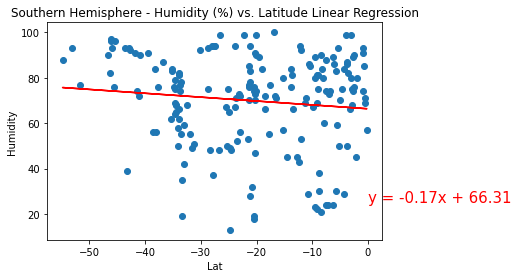

In [36]:
def plotLinearRegression(x_data,y_data,x_lr,y_lr,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_data,y_data)
    plt.plot(x_data,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(x_lr)
    plt.ylabel(y_lr)
    plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
    plt.savefig(f"../Output/fig{ifig}.png")
    plt.show()
    
x_lr = "Lat"
y_lr = "Humidity"
lblpos = (0,25)
plotLinearRegression(southern_hemisphere[x_lr],southern_hemisphere[y_lr],x_lr,y_lr,lblpos,5)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.0838019452279634


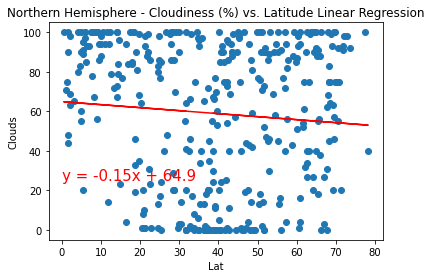

In [37]:
def plotLinearRegression(x_data,y_data,x_lr,y_lr,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_data,y_data)
    plt.plot(x_data,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(x_lr)
    plt.ylabel(y_lr)
    plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
    plt.savefig(f"../Output/fig{ifig}.png")
    plt.show()
    
x_lr = "Lat"
y_lr = "Clouds"
lblpos = (0,25)
plotLinearRegression(northern_hemisphere[x_lr],northern_hemisphere[y_lr],x_lr,y_lr,lblpos,5)

#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.01984802361961876


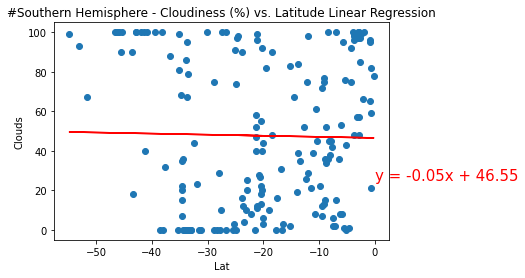

In [38]:
def plotLinearRegression(x_data,y_data,x_lr,y_lr,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_data,y_data)
    plt.plot(x_data,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(x_lr)
    plt.ylabel(y_lr)
    plt.title("#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
    plt.savefig(f"../Output/fig{ifig}.png")
    plt.show()
    
x_lr = "Lat"
y_lr = "Clouds"
lblpos = (0,25)
plotLinearRegression(southern_hemisphere[x_lr],southern_hemisphere[y_lr],x_lr,y_lr,lblpos,5)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04922891911214211


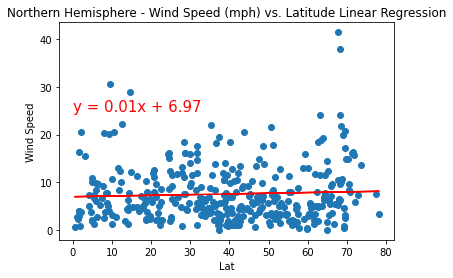

In [39]:
def plotLinearRegression(x_data,y_data,x_lr,y_lr,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_data,y_data)
    plt.plot(x_data,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(x_lr)
    plt.ylabel(y_lr)
    plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
    plt.savefig(f"../Output/fig{ifig}.png")
    plt.show()
    
x_lr = "Lat"
y_lr = "Wind Speed"
lblpos = (0,25)
plotLinearRegression(northern_hemisphere[x_lr],northern_hemisphere[y_lr],x_lr,y_lr,lblpos,5)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0843816055939915


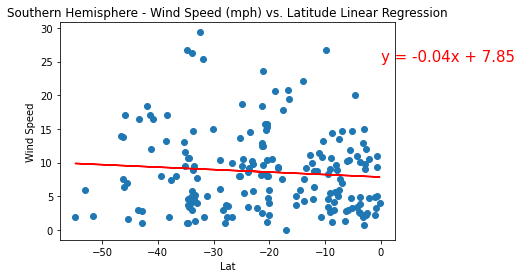

In [40]:
def plotLinearRegression(x_data,y_data,x_lr,y_lr,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_data,y_data)
    plt.plot(x_data,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(x_lr)
    plt.ylabel(y_lr)
    plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
    plt.savefig(f"../Output/fig{ifig}.png")
    plt.show()
    
x_lr = "Lat"
y_lr = "Wind Speed"
lblpos = (0,25)
plotLinearRegression(southern_hemisphere[x_lr],southern_hemisphere[y_lr],x_lr,y_lr,lblpos,5)